# <a href="https://miptstats.github.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Домашнее задание 3

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков можно использовать без ограничений.**

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

* Отрисовка изображений &mdash; 10 баллов
* Построение сети ResNet &mdash; 80 баллов
* Transfer Learning &mdash; 30 баллов





-----

In [1]:
# Bot check

# HW_ID: phds_hw3
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

## Сверточные сети

В этой домашней работе вам предстоит улучшить сверточную сеть для классификации изображений.

#### Биология
Необходимо классифицировать изображения МРТ головного мозга из датасета [**"Brain Tumor Classification (MRI)"**](https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri) и определить вид опухоли.

#### Физика
Необходимо классифицировать изображения солнечного затмения из датасета [**"Solar Eclipse Classification"**](https://www.kaggle.com/datasets/tshr147/solar-eclipse-classification) по степени: частичное, полное и кольцевое.

## Задача 1.

**Пожалуйста, ПРОЧИТАЙТЕ ВНИМАТЕЛЬНО то, что написано ниже, там изложены требования к вашей работе и полезные советы!**


**Требование к работе**

* **Запрещено** использовать тестовые данные где-либо за исключением вычисления финальной оценки качества. Подсказка &mdash; распределение данных на тесте такое же как в тестовых данных.


### Советы

#### Архитектура нейросети
* В отличие от семинара в данном датасете могут встретиться картинки разных размеров. Эту проблему можно решить двумя способами:
  - Используя `torchvision.transforms.Resize` можно привести картинки к единому размеру. Если вы решите использовать этот способ, стоит посмотреть, какого в принципе размера встречаются картинки, чтобы не сжать их слишком сильно. Для картинок одного размера можно обучить бейзлайн в виде полносвязной сети.
  - Учесть переменный размер картинки в архитектуре сети. Общий принцип здесь такой: можно использовать свертки с нужным `padding`, чтобы не иметь проблем из-за уменьшения размеров картинки из-за сверток, последовательно применяя сверточные слои и пуллинги, нужно увеличивать количество каналов одновременно с уменьшением размера картинок (из-за пуллинга), а в конце, получив картинку размера (n_channels, nx, ny), оставить вектор размера (n_channels) (n_channels будет одинаковым для всех картинок, поскольку зависит от архитектуры сети!). Сделать это можно усреднением по пространственным картам [torch.nn.AdaptiveAvgPool2d](https://pytorch.org/docs/stable/generated/torch.nn.AdaptiveAvgPool2d.html).
* Попробуйте разные размеры фильтров, страйдинг, паддинг
* Также можно попробовать разные активации: `tanh`, `leaky relu` и другие.

#### Процесс обучения
* Воспользуйтесь GPU google colab или любой другой GPU, которая у вас есть.
* Для сокращения вычислительной сложности можно поэксперементировать с параметром `stride`. Кроме того можете попробовать разные виды Poooling-ов.
* Помните, что некоторым нейросетям требуется $10$ эпох, чтобы сойтись, а некоторым – $500$. Большие нейросети дольше обучаются.
* Если вы достигли какого-то порога на валидации лучше подождать примерно 10 эпох перед тем как останавливать обучение.

#### И главное:
* Рисуйте кривые обучения: loss и метрика качества (лучше использовать F1-меру) для обучения и валидации.

In [2]:
! pip install torchinfo

from torchinfo import summary

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
import shutil

import torch
from torch import nn
import torchvision
from torchvision import transforms
from sklearn.metrics import f1_score
from sklearn.utils.random import sample_without_replacement
from IPython.display import Image, clear_output
from collections import defaultdict
from torch.optim import lr_scheduler
from matplotlib.animation import FuncAnimation, ImageMagickFileWriter
import time

%matplotlib inline

In [4]:
torch.cuda.is_available()

False

### Для Google Colab
Чтобы не грузить данные каждый раз в колаб при его отключении, а данные сюда грузятся небыстро, будет лучше всего поступить следующим образом.
* Загрузите архив на диск.
* Примонтируйте ваш диск к данному ноутбуку с помощью кода ниже


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


* В панели слева ("Файлы") откройте папку `drive/MyDrive/..` и найдите архив с файлом на диске
* Кликните по файлу и нажмите на кнопку "Скопировать путь"

Теперь вы можете обратиться к данным, используя скопированный путь

## Предобработка данных

In [6]:
# Путь до диска (для напоминания)
DISK_PATH = "/content/drive/MyDrive"
# Путь до архива с данными (пример)
ZIP_PATH = "/content/drive/MyDrive/archive.zip"
# Путь для папки с данными
DATA_PATH = "/content"

Разархивируем данные на диске.

In [7]:
#! rm -rf $DATA_PATH

In [ ]:
! unzip $ZIP_PATH -d  $DATA_PATH

In [9]:
! ls $DATA_PATH

drive  sample_data  Test  Train


In [10]:
output = os.popen(f'ls {DATA_PATH}', 'r').read()
output = output.replace('\x1b[34m', '')
output = output.replace('\x1b[m', '')
test_path = output.split('\n')[0]
train_path = output.split('\n')[1]

### Подготовка датасетов

In [11]:
# Папка с изображениями для тренировки
TRAIN_DIR = os.path.join(DATA_PATH, "Train")
# Папка с изображениями для валидации
VAL_DIR = os.path.join(DATA_PATH, "val")

# Папка с изображениями для теста
TEST_DIR = os.path.join(DATA_PATH, "Test")

In [12]:
! rm -rf $VAL_DIR
os.makedirs(VAL_DIR, exist_ok=True)

# Считываем названия директорий
DIR_LIST = {i:name for i, name in enumerate(os.listdir(TRAIN_DIR))}
# Доля изображений в валидации
VAL_FRAC = 0.3

# Создаем директорию с валидационной выборкой для каждого класса
for dir in DIR_LIST.values():
    os.makedirs(os.path.join(VAL_DIR, dir), exist_ok=True)

    # Считываем выборку изображений
    dir_path = os.path.join(TRAIN_DIR, dir)

    # Сортируем изображения для детерминированнсти
    images_filename = sorted(os.listdir(dir_path))

    # Выбираем случайные изображения из выборки для валидции, с установленным random_state
    num_images = len(images_filename)
    num_val = int(num_images * VAL_FRAC)
    indices = sample_without_replacement(num_images, num_val, random_state=42)
    val_images = np.take(images_filename, indices)

    print(f'{dir} | train images = {num_images - num_val} | val images = {num_val}')

    # Сохраняем валидационную выборку
    for image_filename in val_images:
        source = os.path.join(TRAIN_DIR, dir, image_filename)
        destination = os.path.join(VAL_DIR, dir, image_filename)
        shutil.copy(source, destination)
        os.remove(source)

Annular_solar_eclipse | train images = 493 | val images = 211
Partial_solar_eclipse | train images = 543 | val images = 232
Total_solar_eclipse | train images = 515 | val images = 220


In [13]:
!ls $TRAIN_DIR

Annular_solar_eclipse  Partial_solar_eclipse  Total_solar_eclipse


In [14]:
!ls $VAL_DIR

Annular_solar_eclipse  Partial_solar_eclipse  Total_solar_eclipse


In [15]:
train_dataset = torchvision.datasets.ImageFolder(TRAIN_DIR, transform=transforms.Compose([transforms.ToTensor(),
                                                                                          transforms.Resize((128, 128))]))
val_dataset = torchvision.datasets.ImageFolder(VAL_DIR, transform=transforms.Compose([transforms.ToTensor(),
                                                                                      transforms.Resize((128, 128))]))

Отрисуйте по 3 изображения для каждого класса.

Annular_solar_eclipse


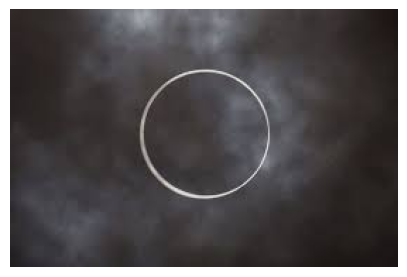

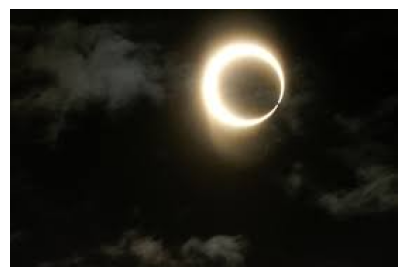

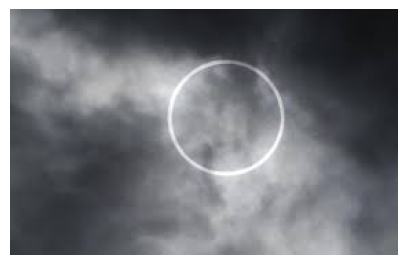

In [16]:
for i in range(3):
  path_to_img = os.path.join(DATA_PATH, f"Train/Annular_solar_eclipse/1{i+2}.jpg")
  image = plt.imread(path_to_img)
  plt.figure(figsize=(5, 5))
  plt.imshow(image)
  plt.axis("off");
print("Annular_solar_eclipse")

Partial_solar_eclipse


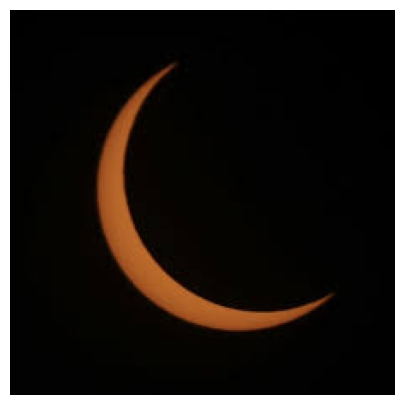

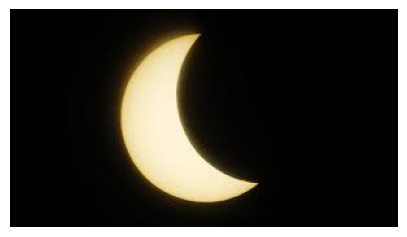

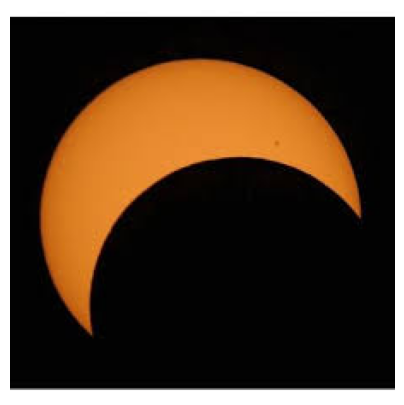

In [17]:
for i in range(3):
  path_to_img = os.path.join(DATA_PATH, f"Train/Partial_solar_eclipse/1{i+2}.jpg")
  image = plt.imread(path_to_img)
  plt.figure(figsize=(5, 5))
  plt.imshow(image)
  plt.axis("off");
print("Partial_solar_eclipse")

Total_Solar_Eclipse


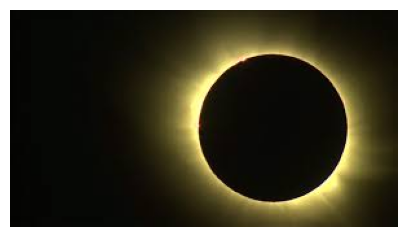

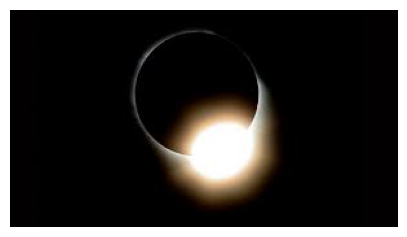

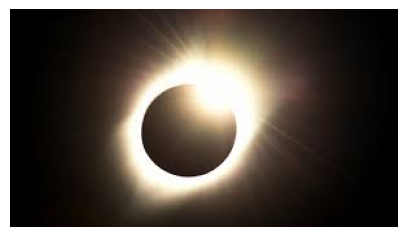

In [18]:
for i in range(3):
  path_to_img = os.path.join(DATA_PATH, f"Train/Total_solar_eclipse/1{i+2}.jpg")
  image = plt.imread(path_to_img)
  plt.figure(figsize=(5, 5))
  plt.imshow(image)
  plt.axis("off");
print("Total_Solar_Eclipse")

## I. Построение сети ResNet

В первой части задания вам предстоит имплементировать сеть ResNet.

#### Архитектура сети

<img src="resblock.png" width="400" align="right" >

Артихектура сети выглядит следующим образом

- В начале сети применяется сверточный слой с большим размером ядра (можно взять 5-7) и пулинг для уменьшения размерности входного изображения.
- Далее следует какое-то количество ResidualBlock'ов. Блоки бывают двух типов: не меняющие пространственную и канальную размерности и сжимающие изображение одновременно с увеличением количества каналов. По мере продвижения в глубину сети количество каналов должно увеличиваться.
- Перед предсказанием класса применяется Global Average Pooling для получения вектора фиксированной размерности, равной количеству каналов в конце сети.
- Предсказание выполняется одним линейным слоем.

Посмотрим как выглядит эффективный ResidualBlock, использованный в оригинальной статье


1. Сначала применяется свертка 1х1 для уменьшения количества каналов (чтобы свертка с размером ядра 3 применялась к изображению с меньшим количеством каналов, т.е. работала быстрее и с меньшим количеством параметров)
2. Далее делается основное преобразование: обычно это типичная последовательность действий `Conv -> BN -> Act`, не меняющая канальную размерность (она меняется при необходимости дальше из тех же соображений, что в п.1). В случае необходимости понизить пространственную размерность можно с помощью параметра `stride` у свертки.
3. Далее с помощью свертки 1х1 изображение приводится к желаемому количеству каналов.
4. В конце к выходу блока прибавляется вход (тот самый skip-connection). В случае если блок понижает пространственную размерность и повышает канальную, размерности исходного изображения и изображения после сверток не сходятся, поэтому перед сложением приходится применять дополнительное преобразование к исходной картинке. Его можно сделать с помощью все той же свертки 1х1 с параметром `stride`, соответствующим основному преобразованию.

#### Реализация сети

В ходе реализации сети вам могут помочь следующие рекомендации

Поскольку мы имеем дело с небольшими датасетами и небольшим количеством классов (и не собираемся доводить до 2048 каналов в конце), нет жесткой необходимости оптмизировать работу сверточных блоков. Вместо этого предлагается сделать менее эффективный, но более богатый параметрами блок. Можно использовать последовательность операций `Conv -> BN -> Act -> Conv -> BN` (перед сложением с "входом" блока лучше на ставить активацию), где одна из сверток выполняется со `stride=2`, если требуется. Также для облегчения обучения сети можно использовать свертку 1х1 (не забывайте нормализацию!) для преобразования входа, даже если увеличение количества каналов и уменьшение размерности не требуется.

1. Реализуйте отдельно ResidualBlock. Убедитесь, что он работает, как ожидается, и в случае сохранения размера изображения, и в случае его изменения. Для удобства мы даем вам шаблон. Не забудьте использовать `padding`.
2. Не забудьте сжать картинку перед применением ResidualBlock'ов с помощью свертки и пулинга. Степень сжатия зависит от размера вашего исходного изображения. Для размера изображения 256х256 можно попробовать сжать в 2-4 раза.
3. Global Average Pooling реализован в PyTorch классом `nn.AdaptiveAvgPool2d`. Для использования в нашей сети его можно добавить после последнего сверточного слоя следующим образом `nn.AdaptiveAvgPool2d((1, 1))`.
4. Вам не нужен ResNet50 :) Для проверки обучения начните с нескольких блоков, которые постепенно сжимают изображение - разжимают каналы в 2 раза. Тем не менее ваша сеть должна постепенно доводить канальную размерность не меньше, чем до 256 каналов.

Для начала реализуйте блок.

In [19]:
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super().__init__()
        self.in_channels = in_channels
        self.out_channels = out_channels
        self.ReLU = nn.ReLU()

        # последовательность операций самого блока
        self.blocks = nn.Sequential(
            nn.Conv2d(self.in_channels,self.in_channels,kernel_size= 3,  padding = 1),
            nn.BatchNorm2d(self.in_channels),
            nn.ReLU(),
            nn.Conv2d(self.in_channels, self.out_channels,kernel_size= 3,  padding = 1, stride = stride),
            nn.BatchNorm2d(self.out_channels),
            nn.ReLU()

        )
        # преобразование над входом до сложения с выходом
        self.downsample = nn.Sequential(
            nn.Conv2d(self.in_channels, self.out_channels,kernel_size= 1, stride = stride),
        )

    def forward(self, x):
        return self.ReLU(self.downsample(x) + self.blocks(x))

Протестируйте блок.

In [20]:
image_batch = torch.ones((3, 16, 67, 67))
block1 = ResidualBlock(16, 16, 1)
assert block1(image_batch).shape == (3, 16, 67, 67), 'Блок не должен менять размер изображения'

In [21]:
image_batch = torch.ones((3, 16, 64, 64))
block1 = ResidualBlock(16, 32, 2)
assert block1(image_batch).shape == (3, 32, 32, 32), 'Блок должен сжать изображение в 2 раза и увеличить количество выходных каналов до 32'

Реализуйте сеть целиком.

In [38]:
class ResNet(nn.Module):
    def __init__(self, num_classes = 3, num_layers=None, layers_params=None):
        """
        Класс реализующий сеть типа ResNet

        param num_classes: количество классов, предсказываемых сетью
        param num_layers: список количества блоков с параметрами layers_params, которые будут добавлены в сеть
        param layers_params: список словарей параметров блоков
        """
        super().__init__()
        # количество классов для классификации
        self.num_classes = num_classes

        # дефолтные значения для примера
        if num_layers is None:
            num_layers = [1, 1, 1, 1, 1]
        if layers_params is None:
            layers_params = [
                {"in_channels": 16, "out_channels": 32, "stride": 2},
                {"in_channels": 32, "out_channels": 64, "stride": 2},
                {"in_channels": 64, "out_channels": 64, "stride": 1},
                {"in_channels": 64, "out_channels": 128, "stride": 2},
                {"in_channels": 128, "out_channels": 128, "stride": 1}
            ]

        assert len(num_layers) == len(layers_params), 'Размеры списков, задающих параметры сети, должны быть одинаковы'

        list_params = [list(layers_params[i].values()) for i in range(np.size(num_layers))]

        # Слои до residual блоков
        self.preprocess = nn.Sequential(
            nn.MaxPool2d(2), # сжимаем
            nn.Conv2d(in_channels=3, out_channels=list_params[0][0], kernel_size=1)
        )

        # Задаем блоки с помощью num_layers и layers_params
        self.residual_blocks = nn.Sequential()

        for i in range(np.size(num_layers)):
          self.residual_blocks.add_module(f"RB{i}",ResidualBlock(list_params[i][0], list_params[i][1], list_params[i][2]))
          self.drop = nn.Dropout(0.3)

        # Голова сети
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))

        last_channels = list_params[-1][1]
        self.fc = nn.Linear(last_channels, num_classes)


    def forward(self, x):
        prepr = self.preprocess(x)

        RBlocs = self.residual_blocks(prepr)

        out = self.avgpool(RBlocs)
        out = torch.flatten(out, 1)
        out = self.fc(out)
        return out



Проверьте, что сеть работает

In [39]:
resnet = ResNet(num_classes=4)
image_batch = torch.ones((3, 3, 36, 36))
image_batch = torch.ones((3, 3, 128, 128))
resnet(image_batch).shape

torch.Size([3, 4])

In [40]:
image_batch = torch.ones((3, 3, 132, 177))
resnet(image_batch).shape

torch.Size([3, 4])

### Вспомогательные функции

In [25]:
def plot_learning_curves(history):
    '''
    Функция для вывода лосса и метрики во время обучения.

    :param history: (dict)
        f1 и loss на обучении и валидации
    '''
    # sns.set_style(style='whitegrid')
    fig = plt.figure(figsize=(15, 5))

    plt.subplot(1,2,1)
    plt.title('Loss', fontsize=15)
    plt.plot(history['loss']['train'], label='train')
    plt.plot(history['loss']['val'], label='val')
    plt.ylabel('Loss', fontsize=15)
    plt.xlabel('Эпоха', fontsize=15)
    plt.legend()

    plt.subplot(1,2,2)
    plt.title('F1', fontsize=15)
    plt.plot(history['f1']['train'], label='train')
    plt.plot(history['f1']['val'], label='val')
    plt.ylabel('F1', fontsize=15)
    plt.xlabel('Эпоха', fontsize=15)
    plt.legend()
    plt.show()

### Обучение сети

**Важные советы:**

1. Если сеть с дефолтным значением lr начнет слишком нестабильно учиться, уменьшите его.
2. Используйте lr_scheduler для улучшения сходимости на более поздних итерациях. Можно, например, уменьшать lr в 2 раза после 3 эпох отсутствия улучшения метрики F1-macro.
3. Используйте параметр `weight_decay`, если сеть будет склонна к переобучению. Начать можно со значения 0.1.
4. Используйте аугментации для борьбы с переобучением. Отличный вариант - не слишком жесткие геометрические преобразования.


Напишите функцию для обучения сети, куда можно передавать аугментации и lr_scheduler в качестве параметров. Используйте их для экспериментов. Также ваша функция должна в качестве параметра принимать директорию, куда будут сохраняться чекпойнты сети по ходу обучения (можете сохранять после каждой эпохи, а можете - только лучший по метрике F1-macro). Создать директорию из функции можно с помощью `os.makedirs(checkpoints_dir)`, а путь к чейкпойнту задавать с помощью `os.path.join(checkpoints_dir, f'epoch_{epoch}.checkpoint')` (для случая сохранения после каждой эпохи). Для сохранения сети используйте `torch.save(model.state_dict(), PATH)`.



**Ваша задача:** добиться метрики F1-macro > 60% на тестовом наборе. Опишите свои эксперименты.

In [41]:
device = "cuda" if torch.cuda.is_available() else 'cpu'
device

'cpu'

Очень плохо. Всё будет очень медленно обучаться, поэтому много экспериментировать не получиться

### Обычная функция трейн с семинаров/домашек, только с возможностью сохранять чекпоинты модели

In [33]:
def train(
    model,
    criterion,
    optimizer,
    scheduler,
    train_batch_gen,
    val_batch_gen,
    dir_name,
    num_epochs=50
):
    '''
    Функция для обучения модели и вывода лосса и метрики во время обучения.

    :param model: обучаемая модель
    :param criterion: функция потерь
    :param optimizer: метод оптимизации
    :param train_batch_gen: генератор батчей для обучения
    :param val_batch_gen: генератор батчей для валидации
    :param num_epochs: количество эпох

    :return: обученная модель
    :return: (dict) F1_score и loss на обучении и валидации ("история" обучения)
    '''
    all_time = 0
    history = defaultdict(lambda: defaultdict(list))

    checkpoints_dir = f"/content/checkpoints_{dir_name}"
    os.makedirs(checkpoints_dir)

    for epoch in range(num_epochs):
        train_loss = 0
        train_f1 = 0
        train_for_f1_b = []
        train_for_f1_p = []
        val_loss = 0
        val_f1 = 0
        val_for_f1_b = []
        val_for_f1_p = []

        start_time = time.time()

        # Устанавливаем поведение dropout / batch_norm  в обучение
        model.train(True)

        # На каждой "эпохе" делаем полный проход по данным
        for X_batch, y_batch in train_batch_gen:
            # Обучаемся на батче (одна "итерация" обучения нейросети)

            #X_batch = transform_train(X_batch)

            X_batch = X_batch.to(device)
            y_batch = y_batch.to(device)

            # Логиты на выходе модели
            logits = model(X_batch)

            # Подсчитываем лосс
            loss = criterion(logits, y_batch.long().to(device))

            # Обратный проход
            loss.backward()
            # Шаг градиента
            optimizer.step()
            # Зануляем градиенты
            optimizer.zero_grad()

            # Сохраяняем лоссы и точность на трейне
            train_loss += loss.detach().cpu().numpy()
            y_pred = logits.max(1)[1].detach().cpu().numpy()
            train_for_f1_b = np.append(train_for_f1_b, y_batch.cpu().numpy())
            train_for_f1_p = np.append(train_for_f1_p, y_pred)

        # Подсчитываем лоссы и сохраням в "историю"
        train_loss /= len(train_batch_gen)
        train_f1 = f1_score(train_for_f1_b, train_for_f1_p, average="macro")
        history['loss']['train'].append(train_loss)
        history['f1']['train'].append(train_f1)


        # Устанавливаем поведение dropout / batch_norm в режим тестирования
        model.train(False)

        # Полный проход по валидации
        for X_batch, y_batch in val_batch_gen:
            X_batch = X_batch.to(device)
            y_batch = y_batch.to(device)

            # Логиты, полученные моделью
            logits = model(X_batch)

            # Лосс на валидации
            loss = criterion(logits, y_batch.long().to(device))

            # Сохраяняем лоссы и точность на валидации
            val_loss += loss.detach().cpu().numpy()
            y_pred = logits.max(1)[1].detach().cpu().numpy()
            val_for_f1_b = np.append(val_for_f1_b, y_batch.cpu().numpy())
            val_for_f1_p = np.append(val_for_f1_p, y_pred)

        # Подсчитываем лоссы и сохраням в "историю"
        val_loss /= len(val_batch_gen)
        val_f1 = f1_score(val_for_f1_b, val_for_f1_p, average="macro")
        history['loss']['val'].append(val_loss)
        history['f1']['val'].append(val_f1)

        scheduler.step(val_loss)
        scheduler_steps.append(optimizer.param_groups[0]['lr'])

        clear_output()

        # Печатаем результаты после каждой эпохи
        print("Epoch {} of {} took {:.3f}s".format(
            epoch + 1, num_epochs, time.time() - start_time))
        print("  training loss (in-iteration): \t{:.6f}".format(train_loss))
        print("  validation loss (in-iteration): \t{:.6f}".format(val_loss))
        print("  training f1: \t\t\t{:.2f} %".format(train_f1 * 100))
        print("  validation f1: \t\t\t{:.2f} %".format(val_f1 * 100))

        plot_learning_curves(history)

        all_time += (time.time() - start_time)

        PATH = os.path.join(checkpoints_dir, f'epoch_{epoch}.checkpoint')
        torch.save(model.state_dict(), PATH)


    return model, history, all_time

In [28]:
batch_size = 128
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=True)

Epoch 25 of 25 took 36.995s
  training loss (in-iteration): 	0.026265
  validation loss (in-iteration): 	0.019338
  training f1: 			99.94 %
  validation f1: 			99.55 %


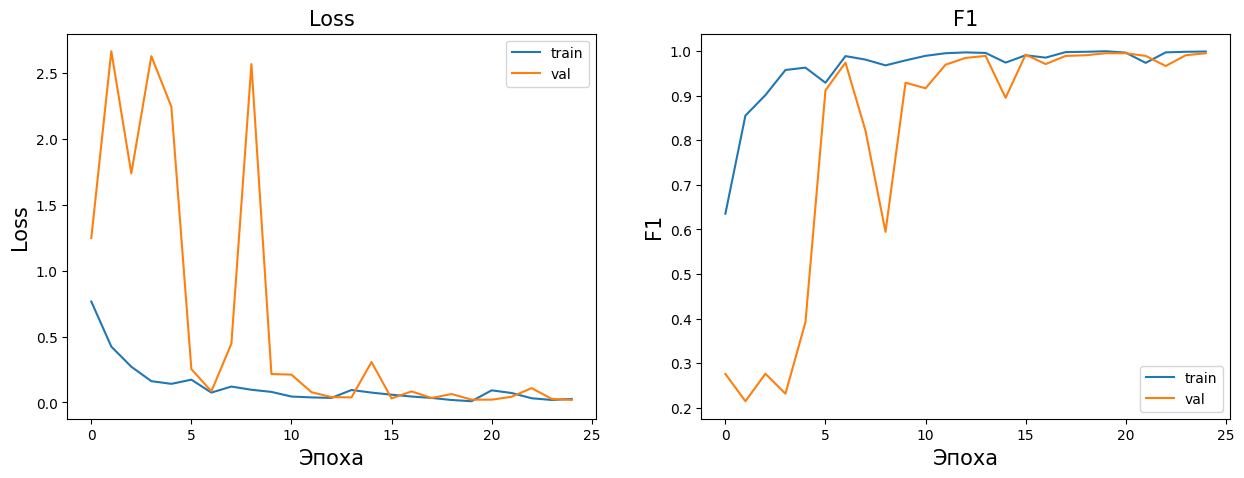

860.2726509571075


In [43]:
model = ResNet().to(device)
criterion = nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
scheduler = lr_scheduler.ReduceLROnPlateau(optimizer, mode="min", patience=3, factor=0.5)

scheduler_steps = []
model, history, all_time = train(
    model, criterion, optimizer, scheduler,
    train_loader, val_loader,
    num_epochs=25,
    dir_name = "Simple"
)
print(all_time)

In [72]:
test_dataset = torchvision.datasets.ImageFolder(TEST_DIR, transform=transforms.Compose([transforms.ToTensor(),
                                                                                          transforms.Resize((128, 128))]))
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

In [73]:
y_b = []
y_p = []
for X_batch, y_batch in test_loader:
    y_b = np.append(y_b, y_batch.cpu().numpy())
    y_p = np.append(y_p, model(X_batch.to(device)).max(1)[1].detach().cpu().numpy())
test_f1_score = f1_score(y_b, y_p, average="macro")
print("Итоговый результат:")
print("Test F1 score:\t\t{:.2f} %".format(test_f1_score * 100))

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


Итоговый результат:
Test F1 score:		99.19 %


Достаточно быстрое, но нестабильное обучение.

Неожиданно высокая точность на тесте для столь простой модели с заданными составителями ноутбука параметрами

С другой стороны в параметрах по умолчанию используется та же логика, что и в оригинальной модели: увеличение каналов в 2 раза с уменьшением размерности в 2 раза

###Теперь попробуем задать параметры слоёв так, как это показано на схемке про ResNet в семинарской презентации

In [67]:
layers_params = [
                {"in_channels": 32, "out_channels": 64, "stride": 2},
                {"in_channels": 64, "out_channels": 64, "stride": 1},
                {"in_channels": 64, "out_channels": 64, "stride": 1},
                {"in_channels": 64, "out_channels": 128, "stride": 2},
                {"in_channels": 128, "out_channels": 128, "stride": 1},
                {"in_channels": 128, "out_channels": 128, "stride": 1},
                {"in_channels": 128, "out_channels": 256, "stride": 2},
                {"in_channels": 256, "out_channels": 256, "stride": 1},
                {"in_channels": 256, "out_channels": 256, "stride": 1},
                {"in_channels": 256, "out_channels": 512, "stride": 2},
                {"in_channels": 512, "out_channels": 512, "stride": 1},

            ]
num_layers = [1,1,1,1,1,1,1,1,1,1,1]

Epoch 22 of 50 took 201.688s
  training loss (in-iteration): 	0.217756
  validation loss (in-iteration): 	2.525484
  training f1: 			92.37 %
  validation f1: 			66.79 %


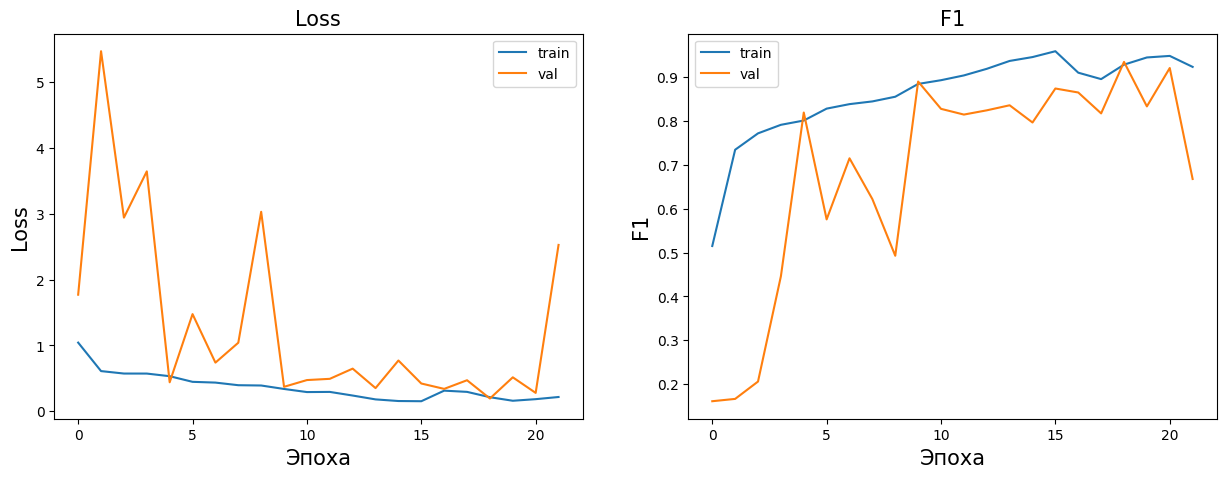

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


KeyboardInterrupt: ignored

In [68]:
model2 = ResNet(layers_params=layers_params, num_layers=num_layers).to(device)
criterion = nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(model2.parameters(), lr=0.001)
scheduler = lr_scheduler.ReduceLROnPlateau(optimizer, mode="min", patience=3, factor=0.5)

scheduler_steps = []
model2, history, all_time = train(
    model2, criterion, optimizer, scheduler,
    train_loader, val_loader,
    num_epochs=50,
    dir_name = "как_в_презентации2"
)
print(all_time)

In [70]:
y_b = []
y_p = []
for X_batch, y_batch in test_loader:
    y_b = np.append(y_b, y_batch.cpu().numpy())
    y_p = np.append(y_p, model2(X_batch.to(device)).max(1)[1].detach().cpu().numpy())
test_f1_score = f1_score(y_b, y_p, average="macro")

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


In [71]:
print("Итоговый результат:")
print("Test F1 score:\t\t{:.2f} %".format(test_f1_score * 100))

Итоговый результат:
Test F1 score:		87.44 %


обучение стабильней не стало, но время возрасло в разы.

Так как я оставил коллаб на ночь, мне не даёт использовать cuda((
 Поэтому пришлось остановить обучение после 21й эпохи(обучалось больше часа!)

 Тем не менее, модель показывает приемлемую точность на тестовой выборке, хоть и ниже более простой модели

### II. Transfer learning

В этой части задания вам нужно зафайнтюнить предобученную модель, посчитать метрику на тестовом наборе и сравнить результат с предыдущем пунктом.

In [62]:
from torchvision.models import resnet18
feature_extractor_model = resnet18(pretrained=True)
for param in feature_extractor_model.parameters():
    param.requires_grad = False
feature_extractor_model.fc
feature_extractor_model.fc = nn.Linear(512, 3)
feature_extractor_model.fc
for param in feature_extractor_model.fc.parameters():
  assert param.requires_grad
transform = torchvision.models.ResNet18_Weights.IMAGENET1K_V1.transforms()
transform

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)

In [63]:
feature_extractor_model = feature_extractor_model.to(device)
criterion = nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(feature_extractor_model.parameters(), lr=0.001)
scheduler = lr_scheduler.ReduceLROnPlateau(optimizer, mode="min", patience=3, factor=0.5)


Epoch 10 of 10 took 67.549s
  training loss (in-iteration): 	0.079820
  validation loss (in-iteration): 	0.071672
  training f1: 			99.03 %
  validation f1: 			99.70 %


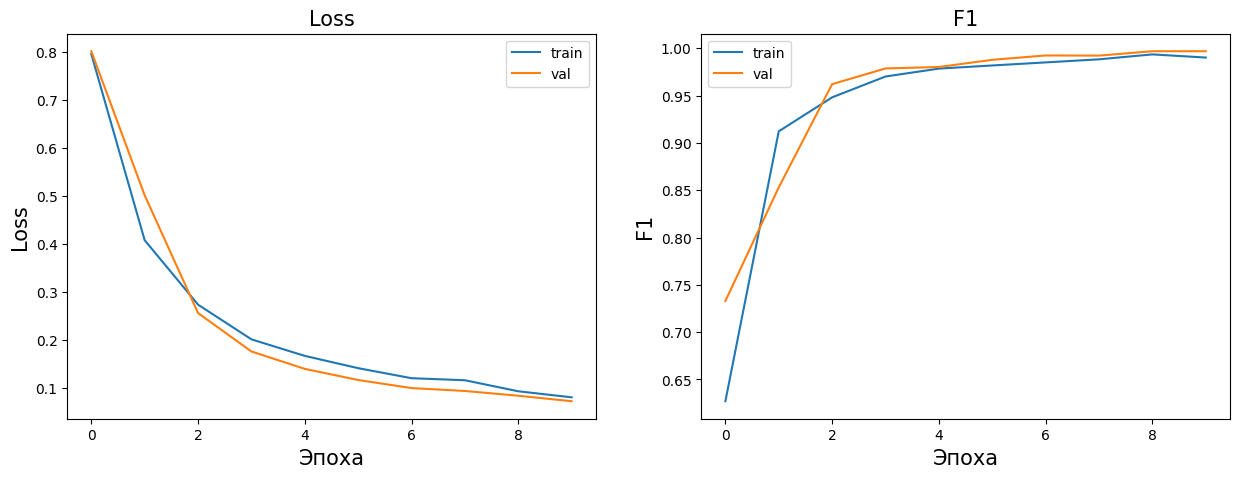

In [65]:
feature_extractor_model, history, all_time = train(
    feature_extractor_model, criterion, optimizer, scheduler,
    train_loader, val_loader,
    num_epochs=10,
    dir_name = "предобученная10"
)

In [66]:
y_b = []
y_p = []
for X_batch, y_batch in test_loader:
    y_b = np.append(y_b, y_batch.cpu().numpy())
    y_p = np.append(y_p, feature_extractor_model(X_batch.to(device)).max(1)[1].detach().cpu().numpy())
test_f1_score = f1_score(y_b, y_p, average="macro")
print("Итоговый результат:")
print("Test F1 score:\t\t{:.2f} %".format(test_f1_score * 100))

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


Итоговый результат:
Test F1 score:		99.48 %


Предобученная модель показала высокую скорость дообучения последнего слоя и высокую точность на тестовой выборке

**Вывод:**

Transfer learning показал более высокие результаты точности на тестовой выборке, хоть, на моё удивление, не далеко ушла от точности простой модели

Не получилость поэкспериментировать с параметрами optimaser'a и scheduler'a потому что нет доступа к cuda и сегодня суббота, поэтому я использовал всё сразу для улучшения точности моделей